In [10]:
import random
import string
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.cm as cm
from matplotlib.colors import Normalize
%matplotlib inline

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

import dataloader

#load data
dataset = dataloader.DataLoader(verbose=True)
x_train, x_test, y_train, y_test, y_reg_train, y_reg_test = dataset.load_data()

#color by label
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=9)
cs = my_cmap(my_norm(y_test))

Loaded training data x (60000, 28, 28, 1) and y (60000, 128) and y_labels (60000,)
Loaded testing data x (10000, 28, 28, 1) and y (10000, 128) and y_labels (10000,)


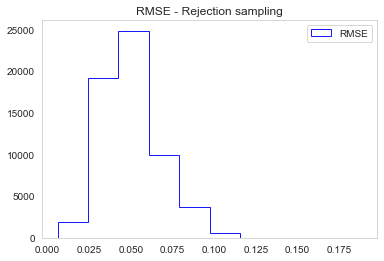

In [12]:
#reference case (in original dimension)
case = 3   

#calculate RMSE for each data (training)
RMSE = np.zeros(y_train.shape)
for i in range(y_train.shape[0]):
    RMSE[i] = mean_squared_error(y_reg_test[case, :], y_reg_train[i, :])
    
#plot hist of errors
plt.figure()
plt.hist(RMSE.flatten(), alpha=0.9, edgecolor='blue', histtype='step', density=False, label="RMSE")
plt.grid(False)
plt.title('RMSE - Rejection sampling')
plt.legend()

In [42]:
#filter data and model that meets threshold
thresh = 0.0117
m_accept = x_train[RMSE < thresh]
d_accept = y_reg_train[RMSE < thresh]

print(m_accept.shape)
print(d_accept.shape)

(86, 28, 28, 1)
(86, 128)


In [43]:
#mean and variance of ensemble
def plotmvar(data1, data2, name=[]):
    f = plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(np.squeeze(data1), cmap="viridis", vmin=0, vmax=1, aspect='equal')
    plt.xticks([]), plt.yticks([])
    plt.title(name+"_$\mu$")

    plt.subplot(1, 2, 2)
    plt.imshow(np.squeeze(data2), cmap="viridis", vmin=0, vmax=0.25)
    plt.xticks([]), plt.yticks([])
    plt.title(name+"_$\sigma$")
    plt.tight_layout()

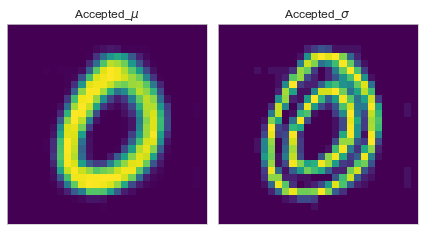

In [44]:
plotmvar(np.mean(m_accept, axis=0), np.var(m_accept, axis=0), name="Accepted")

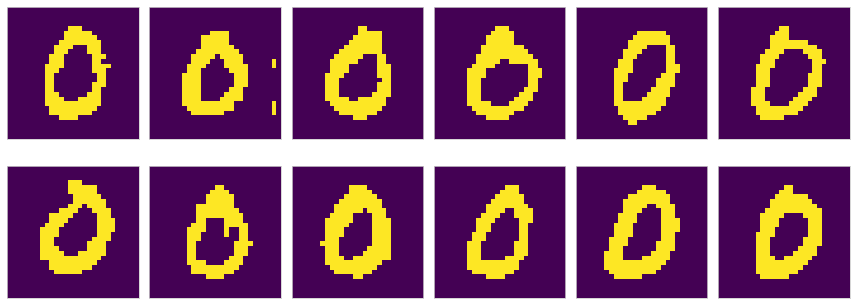

In [45]:
#view perturbed images (rescaled)

f = plt.figure(figsize=(12, 9))
for i in range(12):
    plt.subplot(4, 6, i+1)
    plt.imshow(m_accept[i, :, :, 0], cmap='viridis')
    #plt.title('Pert ('+str(i+1)+')')
    plt.grid(False), plt.xticks([]), plt.yticks([])
plt.tight_layout()
f.savefig('readme/test_m_rej_samp_demo.png')

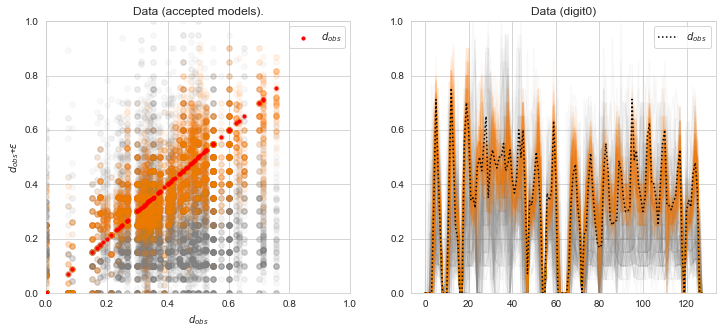

In [46]:
#view perturbed data

f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(1, 2, 1)
plt.scatter(y_reg_test[case,:].flatten(), y_reg_test[case,:].flatten(), s=10, color='red', alpha=1, label="$d_{obs}$", zorder=20)
for i in range(100):
    plt.scatter(y_reg_test[case,:].flatten(), y_reg_test[i,:].flatten(), s=30, color='gray', alpha=0.05)
for i in range(d_accept.shape[0]):
    plt.scatter(y_reg_test[case,:].flatten(), d_accept[i,:].flatten(), s=30, color=cs[y_test[case]], alpha=0.05)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("$d_{obs}$")
plt.ylabel("$d_{obs}$"+"+$\epsilon$")
plt.legend()
plt.title('Data (accepted models).')

ax = f.add_subplot(1, 2, 2)
timesteps = np.linspace(0, 127, 128)
plt.plot(timesteps, y_reg_test[case,:], ls=':', c='k', alpha=1, label="$d_{obs}$", zorder=20)
for i in range(100):
    plt.plot(timesteps, y_reg_test[i,:], color='gray', alpha=0.05)
for i in range(d_accept.shape[0]):
    plt.plot(timesteps, d_accept[i,:], color=cs[y_test[case]], alpha=0.05)
plt.ylim([0, 1])
plt.title('Data (digit'+str(y_test[case])+')')
plt.legend()
f.savefig('readme/test_d_rej_samp_demo.png')